In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IMDb_Prediction import X_train, X_test, y_train, y_test


KeyboardInterrupt



carichiamo i dati puliti

In [6]:
df= pd.read_csv("../data/processed/dataset_pulito.csv")
print("Dataset caricato e pronto all'utilizzo.")

Dataset caricato e pronto all'utilizzo.


Calcoliamo le mediane

In [14]:
soglia_critica= df['Score'].median()
soglia_pubblico= df['IMDB Rating Scaled'].median()

print(f"Soglia Critica (Mediana): {soglia_critica}")
print(f"Soglia Pubblico (Mediana): {soglia_pubblico}")

Soglia Critica (Mediana): 86.0
Soglia Pubblico (Mediana): 720.0


Creiamo la funzione di Classificazione

In [15]:
def classify_movie(row):
    critica=row['Score']
    pubblico=row['IMDB Rating Scaled']

    if critica >= soglia_critica and pubblico >=soglia_pubblico:
        return 'Capolavoro Universale'
    if critica < soglia_critica and pubblico >= soglia_pubblico:
        return 'Crowd Pleaser' #apprezzato dal pubblico ma non dalla critica
    if critica >= soglia_critica and pubblico < soglia_pubblico:
        return 'Gemma della Critica' #amato dalla critica ma non dal pubblico
    if critica < soglia_critica and pubblico < soglia_pubblico:
        return 'Flop' #sotto la sufficienza per entrambi

Applichiamo la funzione appena definita (classify_movie()) per creare la nuova colonna 'Target'

In [16]:
df['Target']= df.apply(classify_movie, axis=1)

# Prevenzione del Data Leakage

Per evitare che il modello legga direttamente dalle feature di input, vanno eliminate le colonne dei voti.

In [17]:
colonne_remove= ['Score', 'IMDB Rating Scaled', 'Adjusted Score', 'Votes']
colonne_presenti= [col for col in colonne_remove if col in df.columns]

df_ml = df.drop(columns=colonne_presenti)

Analisi della distribuzione delle classi

In [18]:
print("\n---DISTRIBUZIONE DELLE CLASSI TARGET ---")
count_classi= df_ml['Target'].value_counts()
print(count_classi)


---DISTRIBUZIONE DELLE CLASSI TARGET ---
Target
Capolavoro Universale    368
Flop                     323
Gemma della Critica      165
Crowd Pleaser            159
Name: count, dtype: int64


Grafico per la presentazione

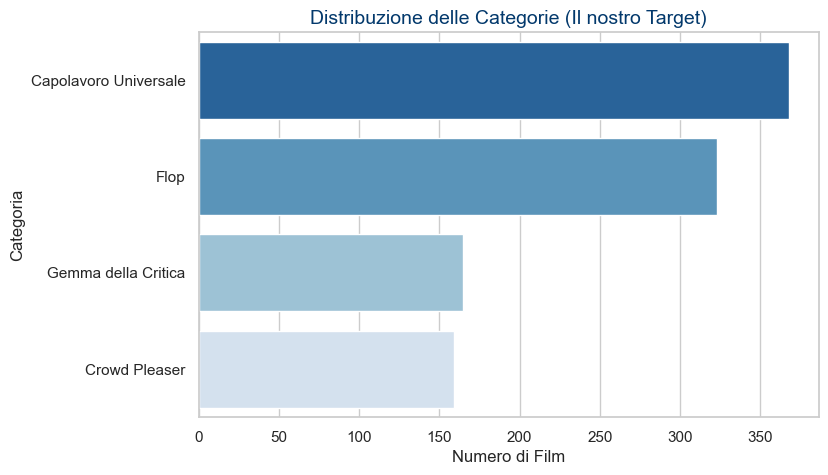

In [19]:
sns.set_theme(style="whitegrid", palette="Blues_r")
plt.figure(figsize=(8, 5))
sns.barplot(x=count_classi.values, y=count_classi.index, hue=count_classi.index, palette="Blues_r", legend=False)
plt.title('Distribuzione delle Categorie (Il nostro Target)', fontsize=14, color='#03396c')
plt.xlabel('Numero di Film', fontsize=12)
plt.ylabel('Categoria', fontsize=12)

#salviamo il grafico
plt.savefig('distribuzione_target.png', bbox_inches='tight')
plt.savefig('distribuzione_target.pdf', bbox_inches='tight')
plt.show()

# Pre-processing e Split

In [20]:
from sklearn.model_selection import train_test_split

rimuoviamo le colonne testuali che per il moemnto non ci servono con gli Alberi di Decisione e il 'Target' fittizio per evitare errori.

In [21]:
colonne_remove= ['Movie', 'Cast', 'Consensus', 'Director']
df_features= df_ml.drop(columns=[col for col in colonne_remove if col in df_ml.columns])

**One-Hot Encoding** per il genere, trasformiamo la colonna 'Imdb_genre' in tante colonne con 0 o 1.

In [22]:
df_features = pd.get_dummies(df_features, columns=['Imdb_genre'], drop_first=True)

Definiamo le Features (X) e il Target (y)

In [23]:
X= df_features.drop(columns=['Target'])
y= df_features['Target']

**Train-Test Split Stratificato**: 'stratify=y' assicura che il 20% del test set contenga la stessa proporzione di "Flop" e "Gemme" del set originale.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
print(f"Dimensioni del set di Addestramento (Training): {X_train.shape[0]} film")
print(f"Dimensioni del set di Test: {X_test.shape[0]} film")
print(f"Numero di Feature (colonne di input): {X_train.shape[1]}")

print("\n--- Verifica Stratificazione nel Training Set ---")
print(y_train.value_counts(normalize=True) * 100)

Dimensioni del set di Addestramento (Training): 812 film
Dimensioni del set di Test: 203 film
Numero di Feature (colonne di input): 10

--- Verifica Stratificazione nel Training Set ---
Target
Capolavoro Universale    36.206897
Flop                     31.896552
Gemma della Critica      16.256158
Crowd Pleaser            15.640394
Name: proportion, dtype: float64


salviamo il dataset per i modelli

In [27]:
path_features= "../data/processed/dataset_features.csv"
df_features.to_csv(path_features, index=False)
print(f"Dataset per il Machine Learning salvato in {path_features}")

Dataset per il Machine Learning salvato in ../data/processed/dataset_features.csv
